In [1]:
"""
Noor Seijdel, 2017
"""

# import packages

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import os.path 
import hddm
#import statsmodels.api as sm
from scipy.stats import pearsonr, percentileofscore, ttest_ind, ttest_rel, wilcoxon, ranksums
from statsmodels.sandbox.stats.multicomp import multipletests
import matplotlib.pyplot as plt
from patsy import center
%matplotlib inline 

# Set seaborn parameters 

cmap = sns.color_palette("hls", 8)
sns.set_palette(cmap)
sns.set_style("white")

# ======== #
# in HDDM 
# ======== #
# a - describes the distance between the decision boundaries
# t - describes all the non-decision time parameters (action, perception etc)
# z - bias that describes the starting point
# v - drift-rate
# dc, sv, st, sz - drift criterion, inter-trial variability

In [2]:
data = hddm.load_csv('/home/nseijde1/scenestats/hddm/sc_hddm/SC_def.csv') 

In [3]:
# test parallel
import ipyparallel as ipp
c = ipp.Client()
c.ids
c[:].apply_sync(lambda : "testing")

['testing', 'testing', 'testing', 'testing']

In [2]:
def run_model(id):
    import hddm
    import os.path
    #exp1, 2a, 2b
    #data = hddm.load_csv('/home/nseijde1/scenestats/hddm/scce_hddm/SCCE_def.csv') 
    #data = hddm.load_csv('/home/nseijde1/scenestats/hddm/sc_hddm/SC_def.csv') 
    data = hddm.load_csv('/home/nseijde1/scenestats/hddm/ce_hddm/CE_def.csv') 
    
    #model0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
    #reg = [] #0
    #reg = ['v ~ CE_c'] #1
    #reg = ['v ~ SC_c'] #2
    #reg = ['a ~ CE_c'] #3
    #reg = ['a ~ SC_c'] #4
    #reg = ['v ~ CE_c', 'a ~ CE_c'] #5
    #reg = ['v ~ SC_c', 'a ~ SC_c'] #6
    reg = ['v ~ CE_squared', 'a ~ CE_squared'] #7
    #reg = ['v ~ SC_squared', 'a ~ SC_squared'] #8
    #reg = ['v ~ CE_c + CE_squared', 'a ~ CE_c + CE_squared'] #9
    #reg = ['v ~ SC_c + SC_squared', 'a ~ SC_c + SC_squared'] #10
    os.chdir(u'/home/nseijde1')
    m = hddm.HDDMRegressor(data, reg, depends_on={'a':'SpAc'},bias=False, p_outlier=0.05)
    m.find_starting_values()
    m.sample(5000, burn=20, thin=2, dbname='traces%i.db'%id, db='pickle')
    return m


In [4]:
jobs = c[:].map(run_model, range(4)) # 4 is the number of CPUs
models7 = jobs.get()

In [12]:
os.chdir(u'/home/nseijde1')

In [5]:
import kabuki

In [6]:
combined_model7 = kabuki.utils.concat_models(models7)

                         mean          std         2.5q          25q          50q          75q        97.5q       mc err
a(Ac)                 1.93458    0.0862746      1.76965      1.87566      1.93389      1.99138      2.10506  0.000919369
a(Sp)                 1.45433    0.0831663      1.29326      1.39817      1.45252      1.50964      1.62233  0.000827553
a_std                0.414852    0.0487022     0.332757      0.38058     0.410031     0.443729     0.523796  0.000554993
a_subj(Ac).ppn10      2.21016    0.0614842      2.09209      2.16922      2.20962       2.2514       2.3337  0.000680289
a_subj(Ac).ppn12      2.65199    0.0744076      2.50791      2.60126      2.65135      2.70227      2.80223  0.000904599
a_subj(Ac).ppn14       2.8059    0.0780536      2.65427      2.75367      2.80527      2.85863      2.95725   0.00109043
a_subj(Ac).ppn16      1.56453    0.0432249      1.48109      1.53446      1.56371      1.59361      1.65084  0.000484008
a_subj(Ac).ppn18      1.60427   

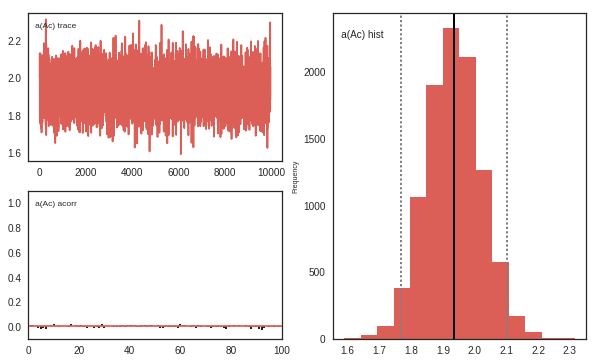

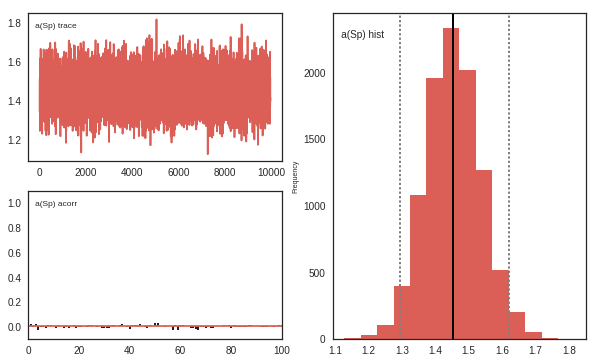

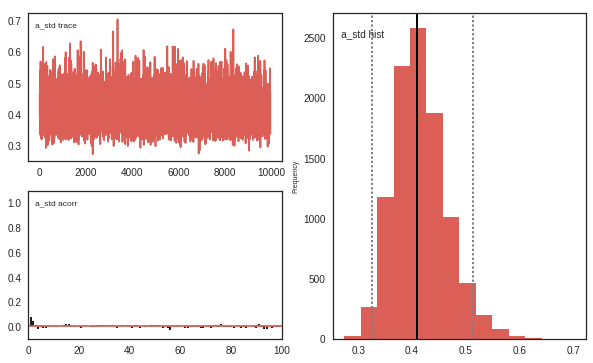

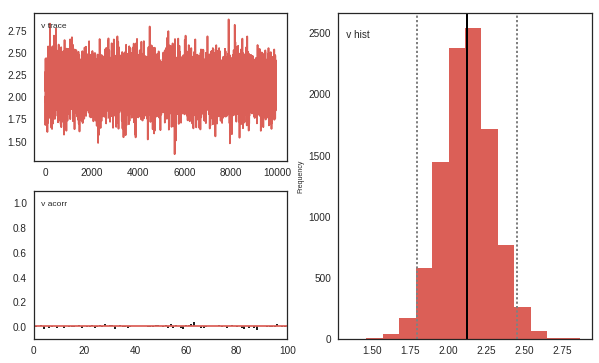

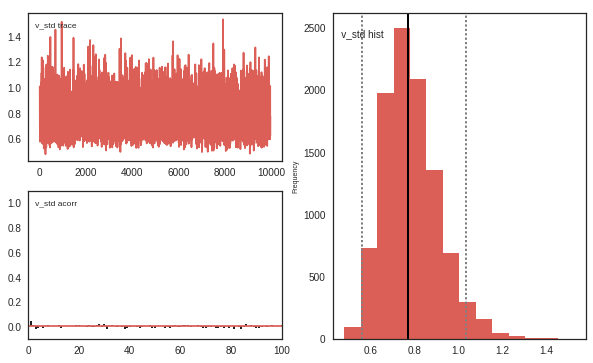

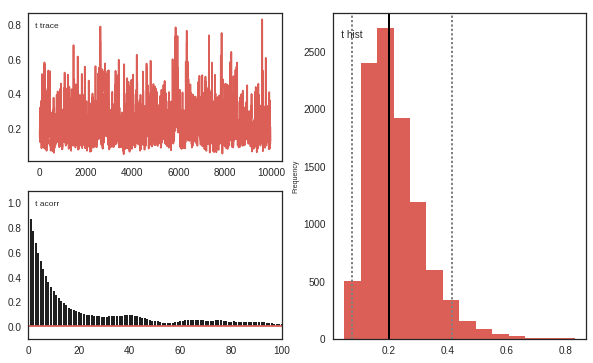

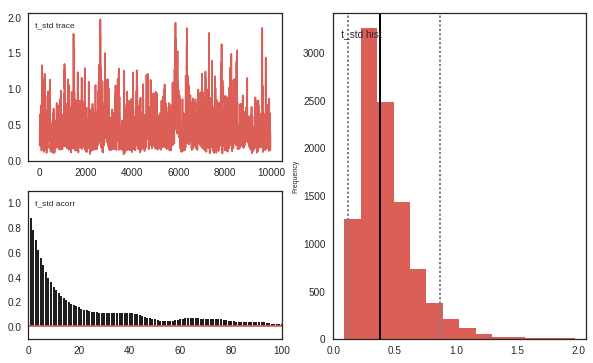

In [7]:
os.chdir(u'/home/nseijde1/scenestats/hddmregression/exp2a/m0')  
combined_model0.save('m0')
combined_model0.print_stats()
combined_model0.plot_posteriors(save=True)

                               mean          std         2.5q          25q          50q          75q        97.5q       mc err
a(Ac)                       1.93394    0.0853362      1.76816      1.87718      1.93266      1.99048      2.10628  0.000817009
a(Sp)                       1.45341    0.0824154      1.29727      1.39746      1.45107      1.50744      1.62095   0.00091357
a_std                      0.414094    0.0487925     0.331119     0.380275     0.409323     0.443467     0.523584  0.000528361
a_subj(Ac).ppn10            2.21077    0.0614905      2.09086      2.16937      2.21027      2.25205       2.3318  0.000726216
a_subj(Ac).ppn12            2.65551    0.0737479      2.51216      2.60535      2.65498      2.70619      2.80099  0.000952514
a_subj(Ac).ppn14            2.80474    0.0779797      2.65584      2.75244       2.8037      2.85618      2.96009   0.00109024
a_subj(Ac).ppn16            1.56473    0.0435449      1.48009      1.53499      1.56454      1.59328      1.651

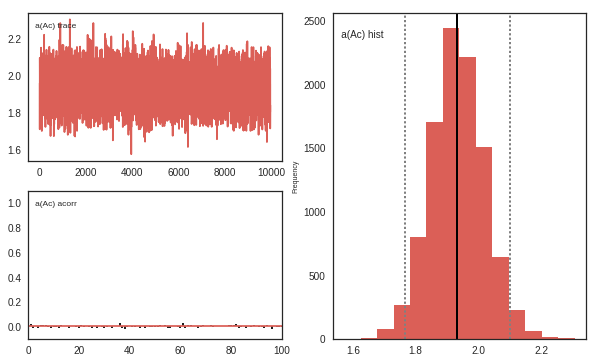

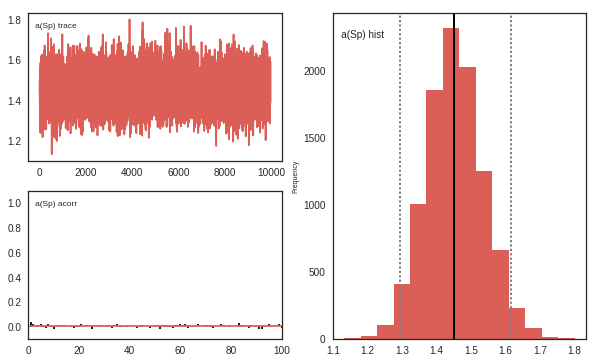

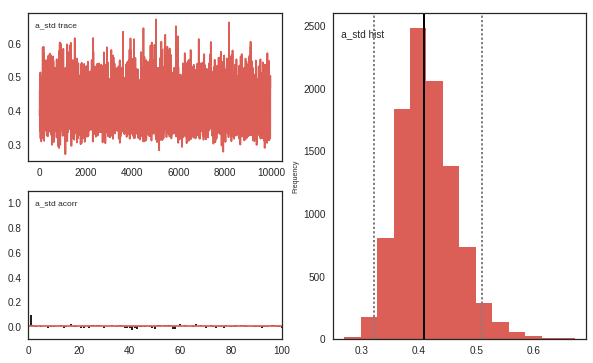

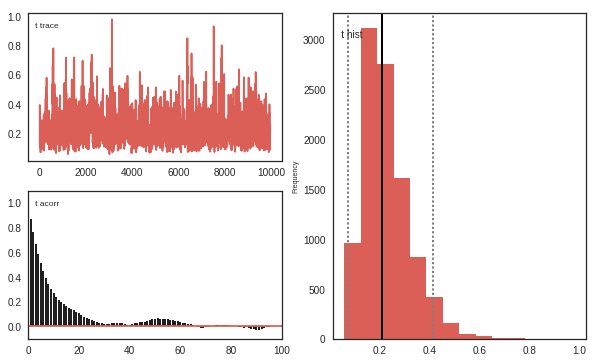

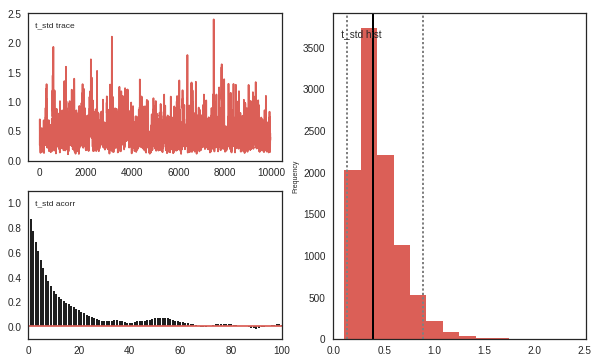

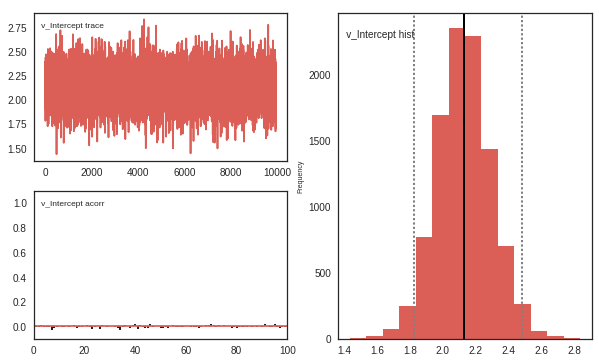

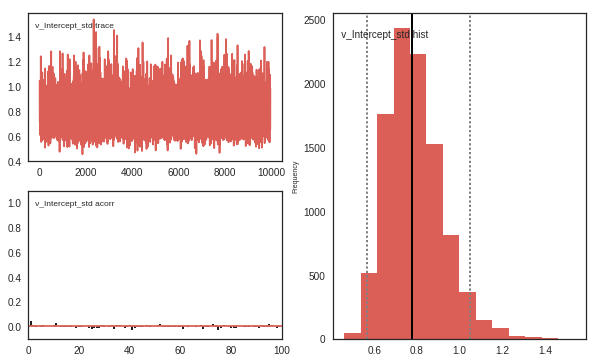

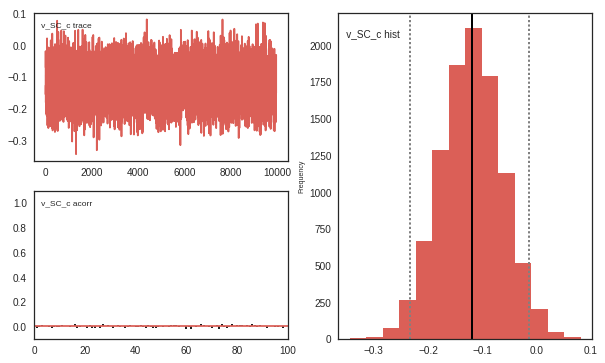

In [15]:
os.chdir(u'/home/nseijde1/scenestats/hddmregression/exp2a/m2')  
combined_model2.save('m2')
combined_model2.print_stats()
combined_model2.plot_posteriors(save=True)

                                   mean          std         2.5q          25q          50q          75q        97.5q       mc err
v                               2.12819     0.166642      1.80166       2.0186      2.12915      2.23408      2.46199   0.00157961
v_std                          0.785377     0.127858      0.58034     0.694748     0.769457     0.860752      1.07455   0.00133272
v_subj.ppn10                    2.06653    0.0713616      1.92739       2.0164      2.06629      2.11526      2.20793  0.000949612
v_subj.ppn12                    2.18376    0.0685819      2.04855      2.13811      2.18325      2.22934      2.31979  0.000866864
v_subj.ppn14                    2.53204     0.077311      2.38079      2.47978      2.53305      2.58372      2.68433   0.00113458
v_subj.ppn16                    2.14455    0.0802901      1.98796      2.09094      2.14455      2.19973      2.29913  0.000948933
v_subj.ppn18                    2.34608     0.079001      2.19653      2.29161     

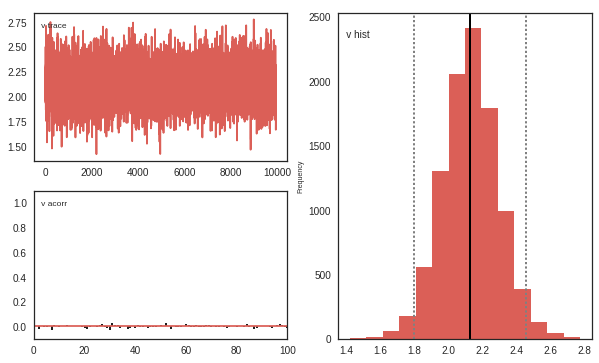

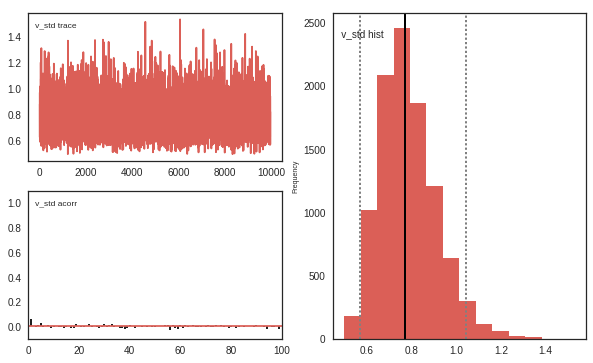

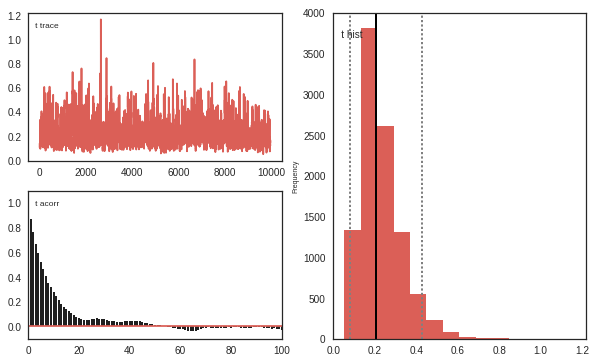

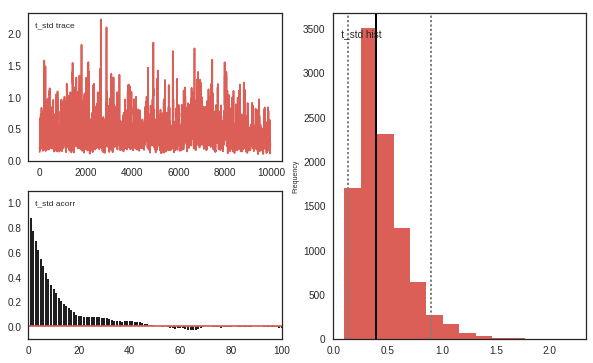

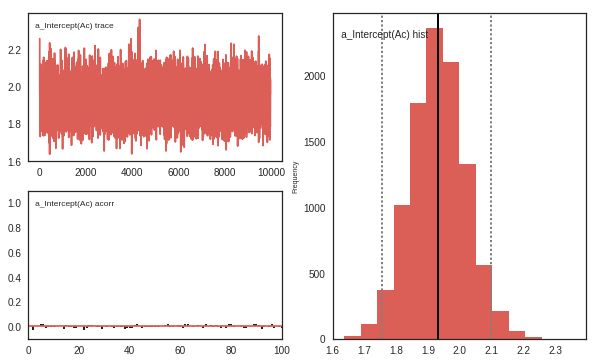

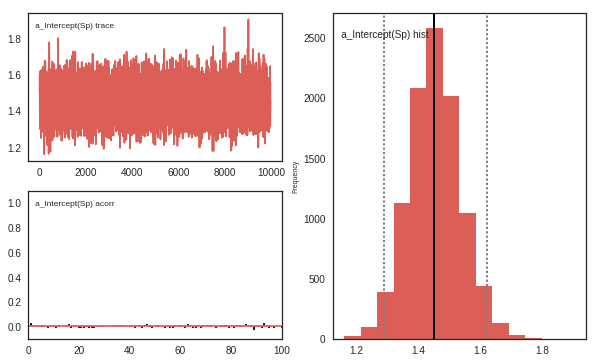

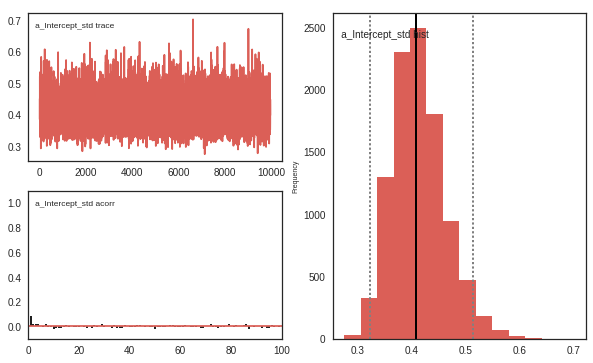

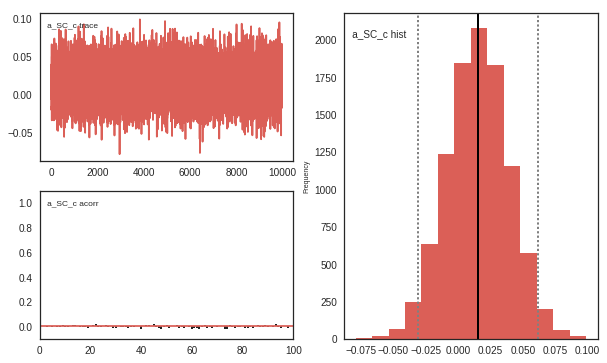

In [8]:
os.chdir(u'/home/nseijde1/scenestats/hddmregression/exp2a/m4')  
combined_model4.save('m4')
combined_model4.print_stats()
combined_model4.plot_posteriors(save=True)

                                   mean          std         2.5q          25q          50q          75q        97.5q       mc err
t                              0.224608    0.0933682    0.0983815     0.158197     0.204666     0.270981     0.459195    0.0034545
t_std                          0.434573     0.212065     0.170506     0.287145     0.384135     0.530167     0.978937   0.00818172
t_subj.ppn10                   0.169683   0.00128444      0.16685     0.168895     0.169766     0.170592     0.171908  1.33009e-05
t_subj.ppn12                 0.00395277   0.00239707  1.62809e-06   0.00206214   0.00413248   0.00576096   0.00837622  4.05007e-05
t_subj.ppn14                  0.0475298   0.00180733    0.0437229    0.0463691    0.0476209    0.0488072    0.0507654  1.82131e-05
t_subj.ppn16                   0.152497  0.000993042     0.150361     0.151892     0.152553      0.15319     0.154266  9.87985e-06
t_subj.ppn18                   0.149998    0.0012919     0.147244     0.149193     

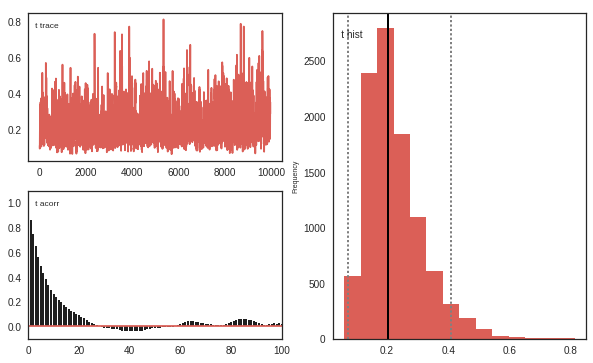

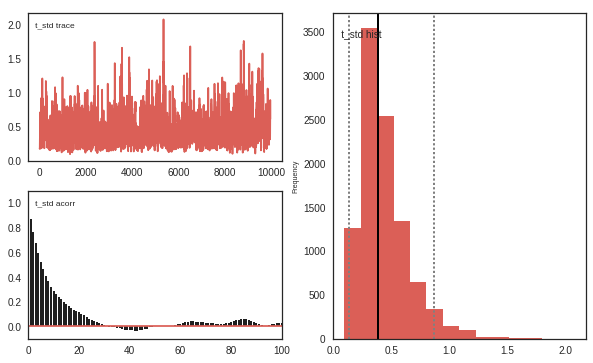

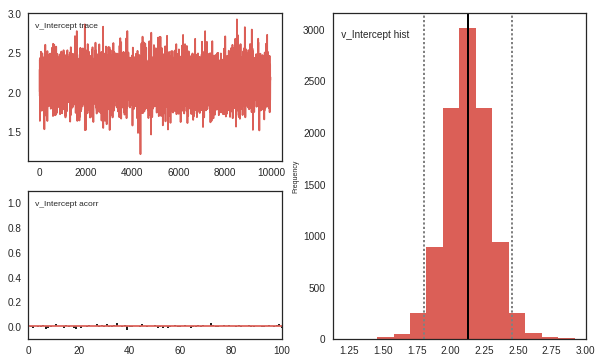

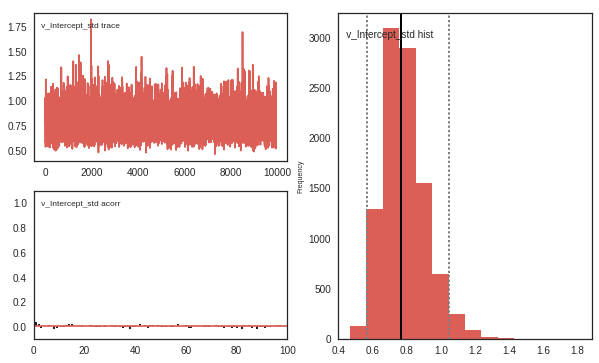

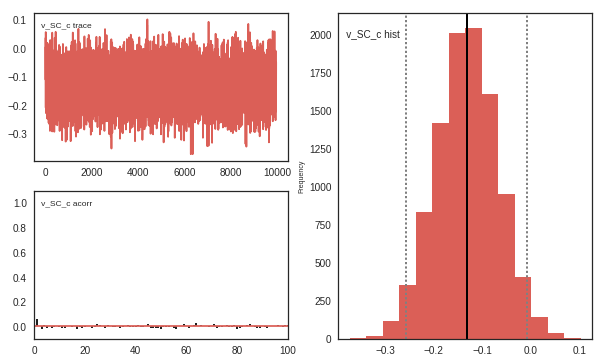

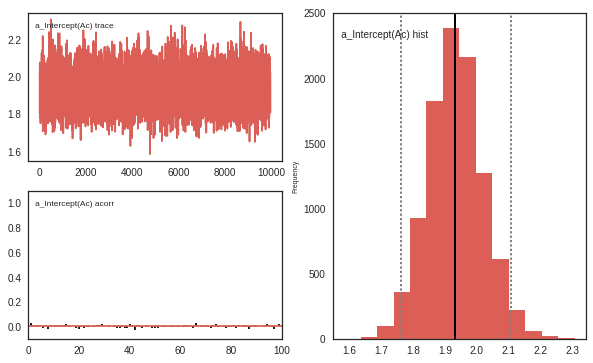

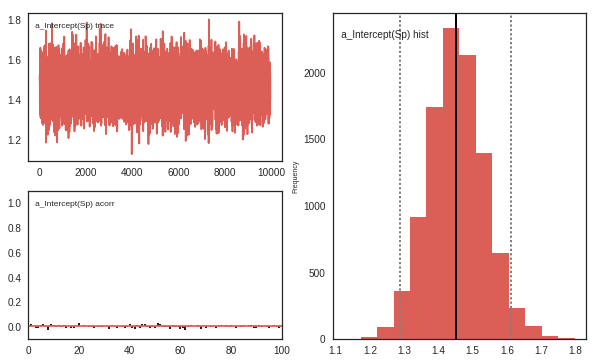

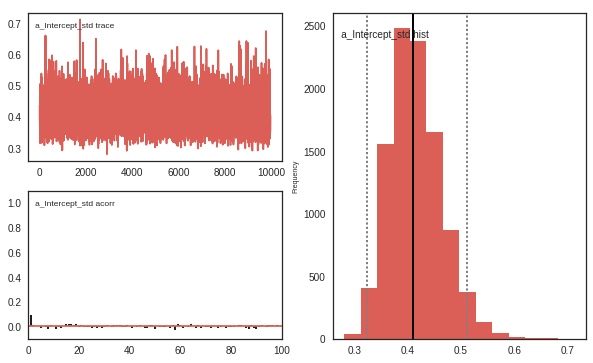

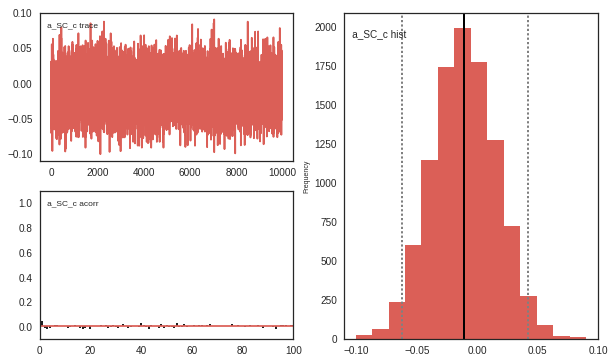

In [8]:
os.chdir(u'/home/nseijde1/scenestats/hddmregression/exp2a/m6')  
combined_model6.save('m6')
combined_model6.print_stats()
combined_model6.plot_posteriors(save=True)

                                   mean          std         2.5q          25q          50q          75q        97.5q       mc err
t                               0.21569    0.0898707    0.0932017     0.153443       0.1963     0.259006     0.441149   0.00357906
t_std                          0.417659     0.204931      0.16297     0.274237     0.367797     0.508097     0.957878    0.0086939
t_subj.ppn10                   0.169699   0.00127241     0.166948       0.1689     0.169792     0.170596     0.171948  1.28127e-05
t_subj.ppn12                 0.00398156    0.0024231  5.66259e-07   0.00209779   0.00411634   0.00582034    0.0084189  4.25896e-05
t_subj.ppn14                  0.0476678   0.00179108    0.0437908    0.0465662    0.0477742    0.0489289    0.0508081  1.70289e-05
t_subj.ppn16                   0.152482  0.000999905     0.150322     0.151845     0.152555     0.153186     0.154204  1.00797e-05
t_subj.ppn18                    0.14993   0.00133284     0.147026     0.149099     

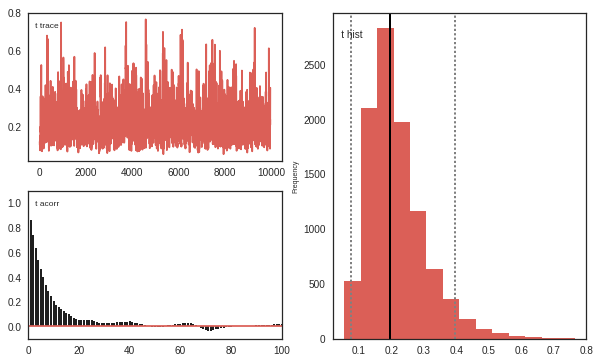

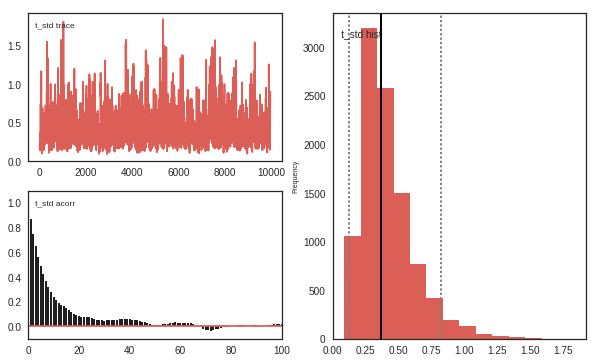

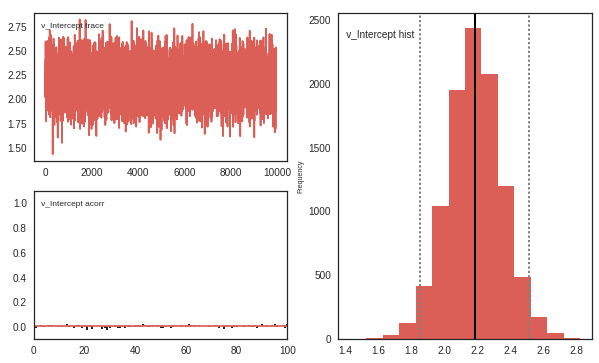

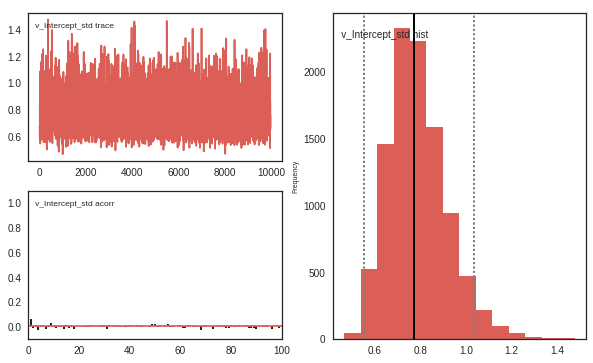

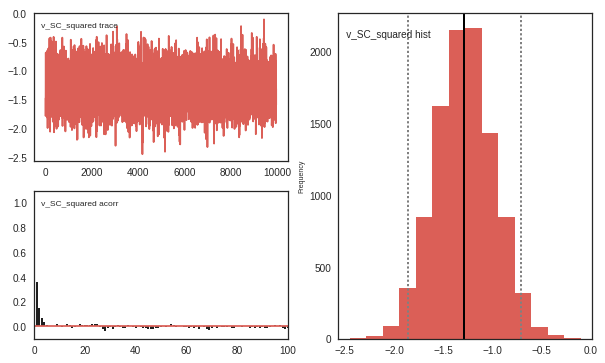

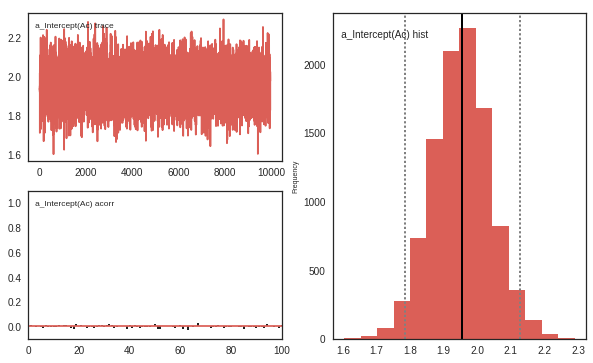

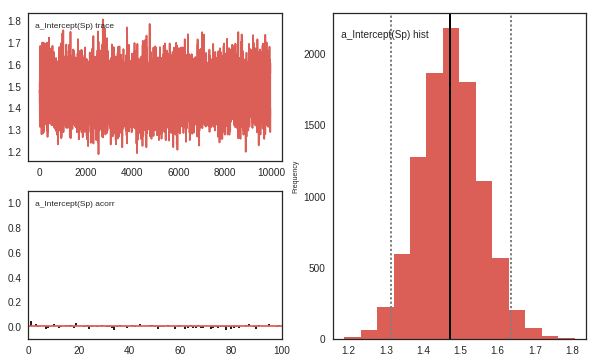

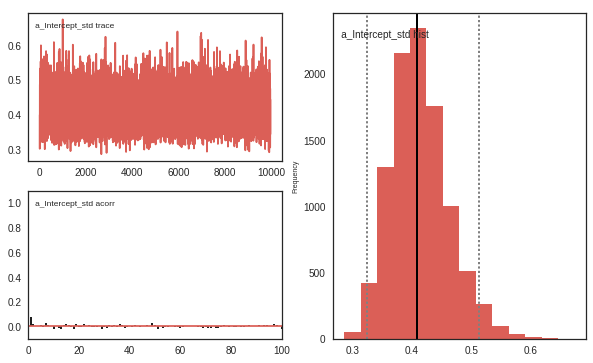

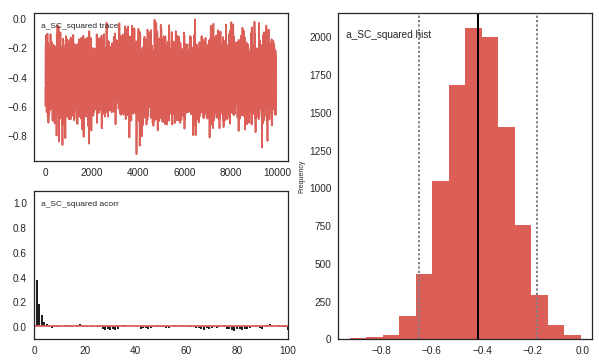

In [7]:
os.chdir(u'/home/nseijde1/scenestats/hddmregression/exp2a/m8')  
combined_model8.save('m8')
combined_model8.print_stats()
combined_model8.plot_posteriors(save=True)

                                   mean          std         2.5q          25q          50q          75q        97.5q       mc err
t                              0.222107    0.0952904    0.0948003     0.153201     0.201879     0.269425     0.459344   0.00355218
t_std                          0.430548     0.216838     0.164848     0.277082     0.378683     0.528242     0.996082   0.00852495
t_subj.ppn10                   0.169738   0.00127636      0.16694     0.168944     0.169857     0.170637     0.171952  1.35076e-05
t_subj.ppn12                 0.00401313   0.00243052  1.37769e-07   0.00216476   0.00419742   0.00584891   0.00839537   5.5081e-05
t_subj.ppn14                  0.0477184   0.00183949    0.0437904    0.0465494    0.0478422    0.0490188    0.0509574  1.93583e-05
t_subj.ppn16                   0.152464  0.000983856     0.150313     0.151854      0.15254     0.153167      0.15417  1.02244e-05
t_subj.ppn18                   0.149967   0.00130546     0.147176     0.149142     

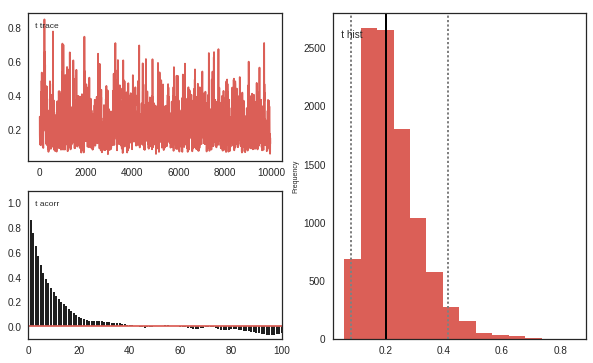

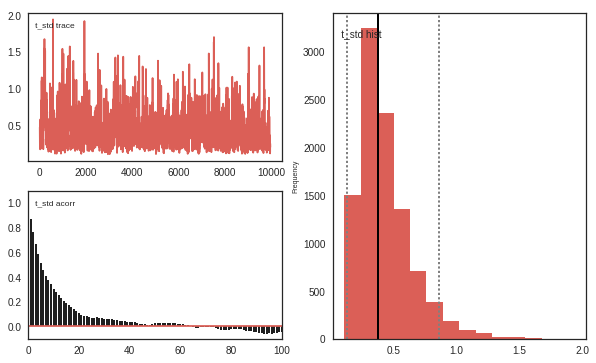

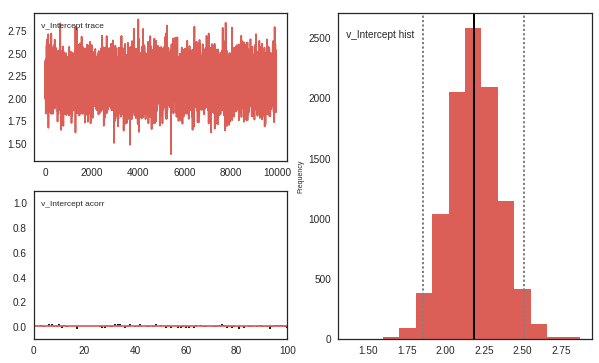

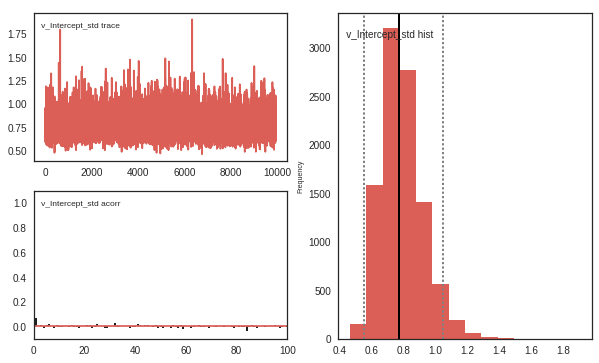

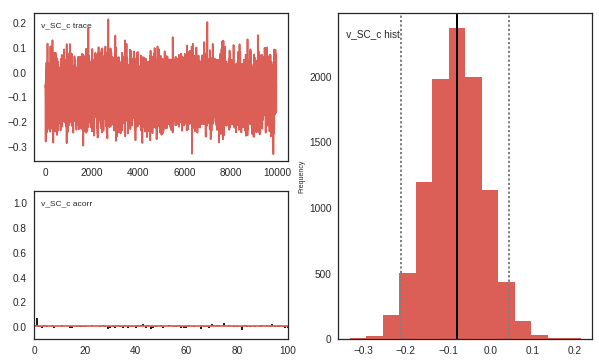

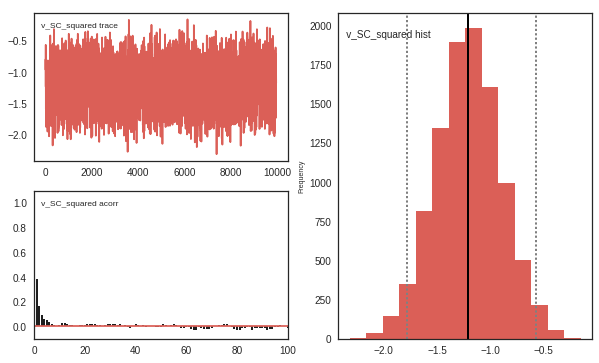

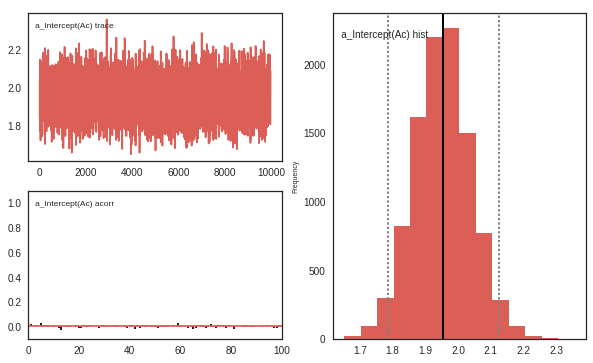

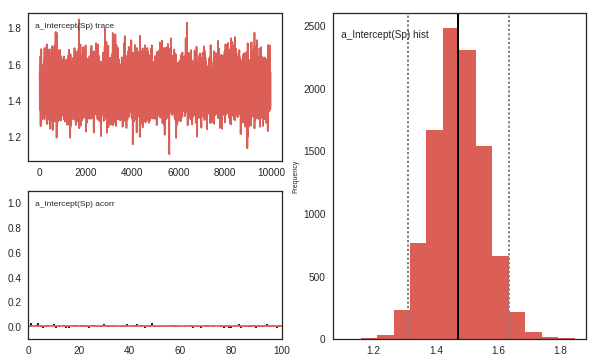

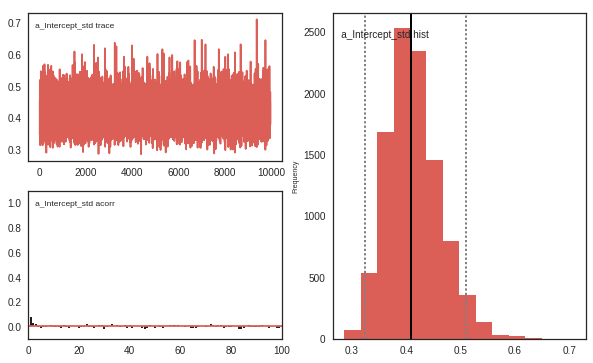

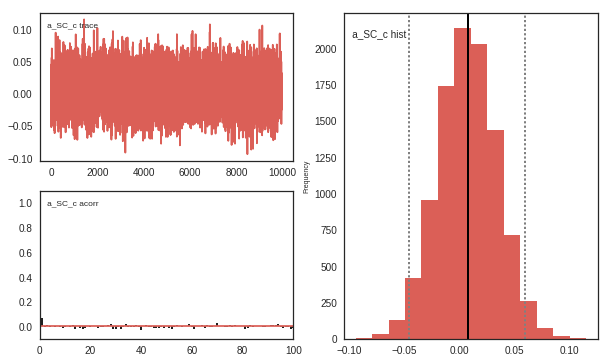

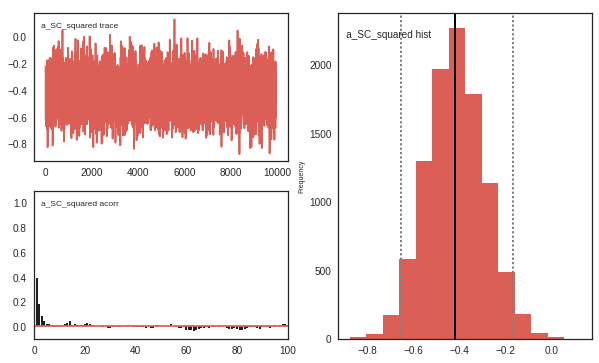

In [7]:
os.chdir(u'/home/nseijde1/scenestats/hddmregression/exp2a/m10')  
combined_model10.save('m10')
combined_model10.print_stats()
combined_model10.plot_posteriors(save=True)

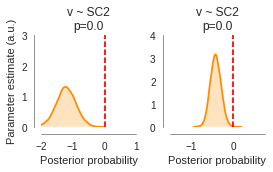

In [21]:
fig_dir = u'/home/nseijde1/scenestats/hddmregression/exp2a'
params_of_interest = ['v_SC_squared', 'a_SC_squared']
titles = ['v ~ SC2','a ~ SC2' ]

traces = []
for p in range(len(params_of_interest)):
    traces.append(combined_model10.nodes_db.node[params_of_interest[p]].trace.gettrace())

stats = []
for p in range(len(params_of_interest)):
    stat = min(np.mean(traces[p] > 0), np.mean(traces[p] < 0))
    stats.append(min(stat, 1-stat))
#stats = np.array(stats)    

fig, axes = plt.subplots(nrows=1, ncols=len(params_of_interest), figsize=(len(params_of_interest)*2,2.5))


ax_nr = 0
pl = 0
cc=['darkorange','darkorange']
for p in range(len(params_of_interest)):
    data = [traces[p]]
    ax = axes[ax_nr]
    for d, label, c in zip(data, ['1',], ['black']):
        sns.kdeplot(d, vertical=False, shade=True, color=cc[pl], ax=ax)
        ax.set_xlabel('Posterior probability')
        ax.set_title('{}\np={}'.format(titles[pl], round(stats[p],3)))
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
            ax.tick_params(width=0.5)          
        ax_nr+=1
        
sns.despine(offset=7, trim=False)
axes[0].set_ylabel('Parameter estimate (a.u.)')
axes[0].axvline(x=0, color='r', linestyle='--')
axes[1].axvline(x=0, color='r', linestyle='--')
axes[0].set_ylim(0,3)
axes[0].set_xlim(-2,1)
axes[1].set_ylim(0,4)
axes[1].set_xlim(-1.5,0.75)

plt.tight_layout()
fig.savefig(os.path.join(fig_dir, 'posteriors.pdf'))